# Task 1: Gradient Descent Algorithm

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [132]:
# Returns a vector, which is the result of the gradient
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(differenceNorms):
    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(1, differenceNorms.size + 1, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\ngradient descent algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)

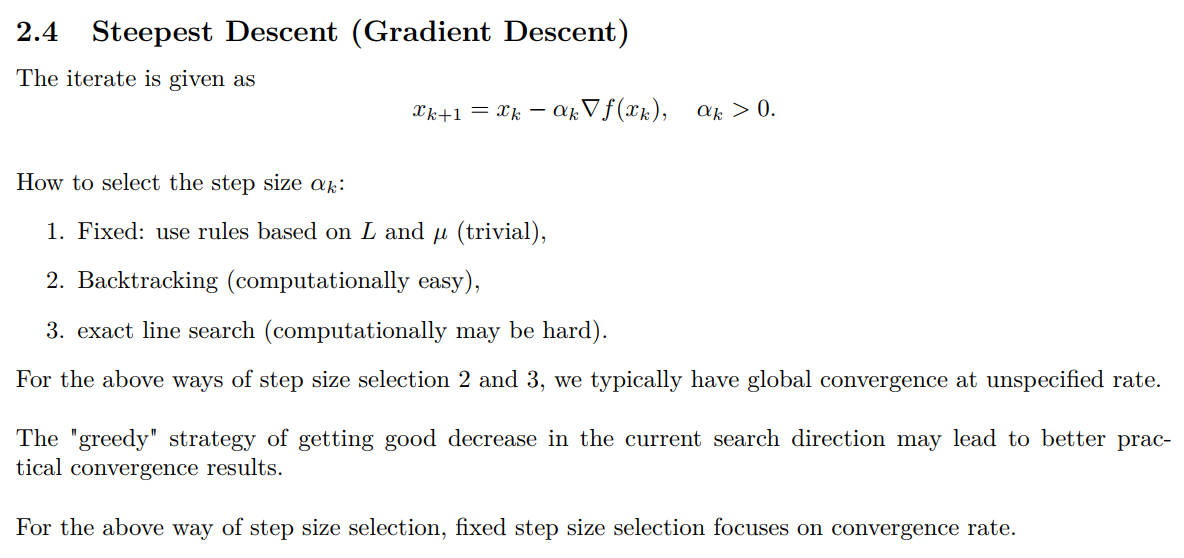

In [133]:
def gradientDescent(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = []
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        x = x - alpha * gradient(A, b, x)
        x_iterations.append(x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    differenceNorms = []
    for x_sol in x_iterations:
        differenceNorms.append(differenceNorm(x_sol, x))
    differenceNorms = np.array(differenceNorms)
    return (x, x_iterations, differenceNorms, stoppingReason)

The matrix A
[[ 5.3751171   9.23092792  8.83630919]
 [ 9.23092792 17.84901516 14.99615967]
 [ 8.83630919 14.99615967 16.22057084]]

The vector b
[50.3459005  89.91743725 87.49034104]

The dimension is 3

Optimal solution x found by gradient descent
[5.18910823 0.93424884 1.67840743]

Theoretical optimal solution x*
[1 2 3]

Reason of stopping
Max iterations (5000) exceeded


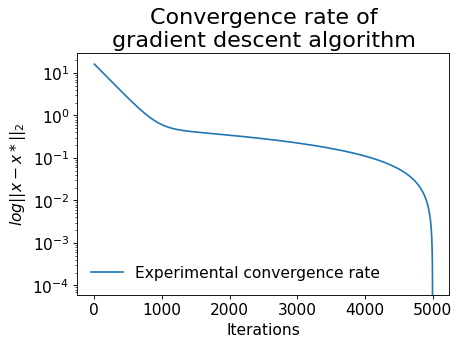

In [134]:
# Choose scale option
scale = "small"
# scale = "large"
# scale = "huge"

A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
print("The matrix A")
print(A)

b = np.load(f"{scale}Vector.npy", allow_pickle=True)
print("\nThe vector b")
print(b)
x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

print(f"\nThe dimension is {b.size}")

x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = gradientDescent(A, b)
print("\nOptimal solution x found by gradient descent")
print(x_opt_GD)
print("\nTheoretical optimal solution x*")
print(x_opt)
print("\nReason of stopping")
print(stoppingReason)

plotDifferenceNorms(differenceNorms)

The matrix A first two lines
[77.47884308 67.20860406 53.41517914 55.83997086 55.65212282 68.24230098
 48.01783228 56.19355533 49.58743731 68.69026142 50.64044028 60.33331026
 48.18864451 42.05627212 60.76891825 56.23595122 59.98201872 53.07716706
 48.54267329 63.34076446]
[67.20860406 83.35824993 54.41507042 61.18629922 56.45122011 75.58657564
 42.23010613 65.81679437 51.30935711 70.53888354 54.19461819 63.12001131
 46.18098371 43.68606257 59.12747543 64.52729381 60.77075199 54.85398053
 53.97564175 64.45761775]

The vector b
[11673.88186531 12187.06062788 10998.48125905 11025.71932468
 12340.71211116 13172.72266651  9341.96267409 11431.00556045
  9548.18618818 12947.61715601  8908.74184069 12803.01232136
  8656.52874585  9700.43831711 11698.99871462 10801.56564883
 12433.72317307 11406.42137025 10636.19616585 12261.90087933]

The dimension is 20

Optimal solution x found by gradient descent
[ 0.21045763  2.98825654  3.29207569  5.00710182  6.32155442  4.29998695
  6.53695083  7.00053

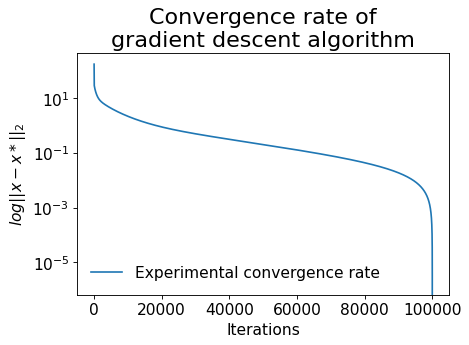

In [135]:
# Choose scale option
# scale = "small"
scale = "large"
# scale = "huge"

A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
print("The matrix A first two lines")
print(A[0])
print(A[1])

b = np.load(f"{scale}Vector.npy", allow_pickle=True)
print("\nThe vector b")
print(b)
x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

print(f"\nThe dimension is {b.size}")

x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = gradientDescent(A, b, 100000)
print("\nOptimal solution x found by gradient descent")
print(x_opt_GD)
print("\nTheoretical optimal solution x*")
print(x_opt)
print("\nReason of stopping")
print(stoppingReason)

plotDifferenceNorms(differenceNorms)

In [136]:
# Choose scale option
# scale = "small"
# scale = "large"
scale = "huge"

A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
# print("The matrix A first line")
# print(A[0])

b = np.load(f"{scale}Vector.npy", allow_pickle=True)
# print("\nThe vector b")
# print(b)
x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

print(f"\nThe dimension is {b.size}")

x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = gradientDescent(A, b, 100000, 1e-30)
print("Optimal solution x found by gradient descent")
print(x_opt_GD)
print("\nTheoretical optimal solution x*")
print(x_opt)
print("\nReason of stopping")
print(stoppingReason)

#plotDifferenceNorms(differenceNorms)


The dimension is 100
Optimal solution x found by gradient descent
[inf inf inf inf inf inf inf inf inf inf inf inf nan inf inf inf inf inf
 inf inf inf inf inf nan inf inf inf nan nan nan inf nan inf nan inf inf
 inf inf inf inf nan inf inf inf nan inf nan inf inf nan inf inf inf inf
 nan inf inf nan inf inf nan inf nan inf inf inf inf inf nan inf inf inf
 nan inf inf inf inf inf inf inf inf inf inf inf inf nan inf inf inf inf
 inf nan inf inf inf inf inf inf nan inf]

Theoretical optimal solution x*
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Reason of stopping
Gradient norm smaller than 1e-30


C:\Users\nguye\AppData\Local\Temp\ipykernel_26120\134354667.py:13: RuntimeWarning: invalid value encountered in subtract
  x = x - alpha * gradient(A, b, x)
C:\Users\nguye\AppData\Local\Temp\ipykernel_26120\3954930924.py:11: RuntimeWarning: invalid value encountered in subtract
  return np.linalg.norm(x - x_opt)


It appears that the implemented gradient descent has a linear convergence rate

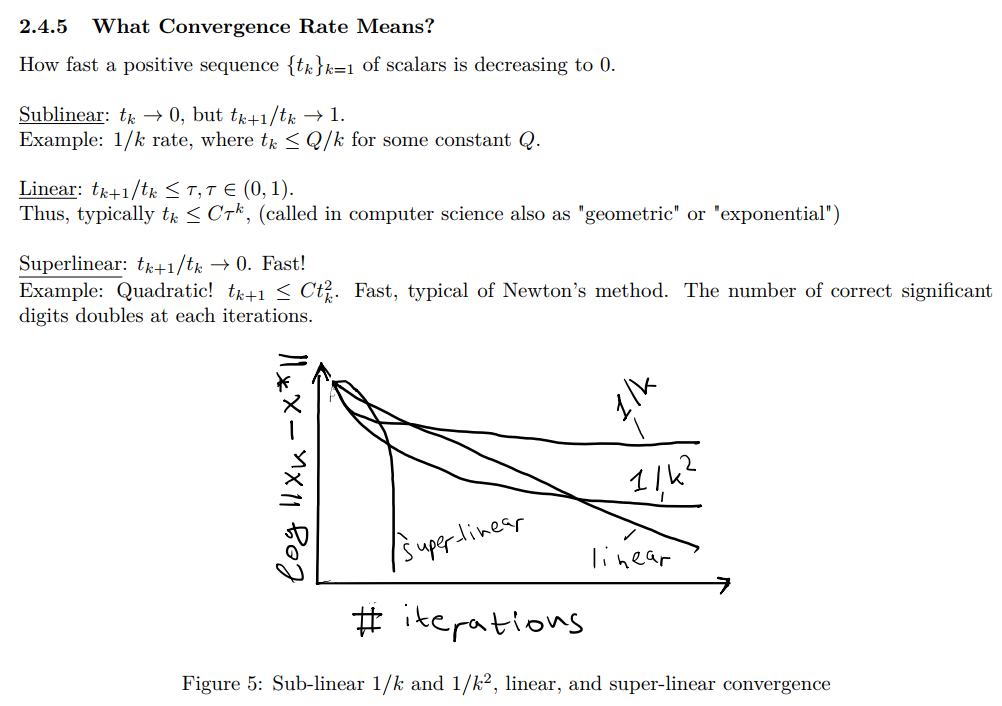

## Order of convergence $\alpha$ and rate of convergence $\lambda$
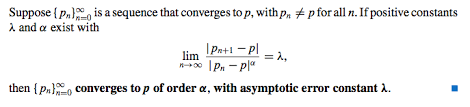
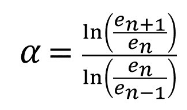
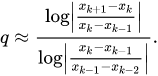

In [137]:
errors = np.abs(np.diff(differenceNorms))

errors_nminus1 = errors[:-2]

errors_n = errors[:-1]
errors_n = errors_n[1:]

errors_nplus1 = errors[2:]

orderOfConvergences = np.divide(np.log(np.abs(np.divide(errors_nplus1, errors_n))), np.log(np.abs(np.divide(errors_n, errors_nminus1))))

print(orderOfConvergences)

[nan nan nan ... nan nan nan]


In [138]:
errors = np.abs(np.diff(differenceNorms))

errors_nminus1 = errors[:-2]

errors_n = errors[:-1]
errors_n = errors_n[1:]

errors_nplus1 = errors[2:]

orderOfConvergences = np.divide(np.log(np.abs(np.divide(errors_nplus1, errors_n))), np.log(np.abs(np.divide(errors_n, errors_nminus1))))

print(orderOfConvergences)

[nan nan nan ... nan nan nan]


In [139]:
orderOfConvergence = 1

x_nplus1_minus_x_opt = np.array(list(map(lambda x: norm(x), np.abs(x_iterations_GD[:-1] - x_opt_GD))))

x_n_minus_x_opt = np.power(np.array(list(map(lambda x: norm(x), np.abs(x_iterations_GD[1:] - x_opt_GD)))), orderOfConvergence) 

x_nplus1_minus_x_opt[x_nplus1_minus_x_opt == 0] = 1e-9
x_n_minus_x_opt[x_n_minus_x_opt == 0] = 1e-9
rateOfConvergences = np.divide(x_nplus1_minus_x_opt, x_n_minus_x_opt)
print(rateOfConvergences)

# The rate of convergence seems to be 1.014

[nan nan nan ... nan nan nan]


C:\Users\nguye\AppData\Local\Temp\ipykernel_26120\2449733212.py:5: RuntimeWarning: invalid value encountered in subtract
  x_n_minus_x_opt = np.power(np.array(list(map(lambda x: norm(x), np.abs(x_iterations_GD[1:] - x_opt_GD)))), orderOfConvergence)


In [140]:
figure(figsize=(8, 6), dpi=80)

print(rateOfConvergences.size)
iterations = np.arange(0, rateOfConvergences.size, 1)
print(iterations)
plt.plot(iterations, rateOfConvergences, label = f"Experimental convergence rate")#, marker='.', markersize=5)

size = 10

plt.title(f"Experimental convergence rate", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.yscale('log')
plt.xlabel("Iterations", size=size)
plt.ylabel('Difference norm', size=size)

legend = plt.legend(loc=4, frameon=False, fontsize=size + 4)

1599
[   0    1    2 ... 1596 1597 1598]


ValueError: Data has no positive values, and therefore can not be log-scaled.